# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
![kaggle1.png](attachment:kaggle1.png)
![kaggle2.png](attachment:kaggle2.png)
2. Scroll down to API and click Create New API Token.
![kaggle3.png](attachment:kaggle3.png)
![kaggle4.png](attachment:kaggle4.png)
3. Open up `kaggle.json` and use the username and key.
![kaggle5.png](attachment:kaggle5.png)

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [6]:
!pip install -U pip
!pip install ipython
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 21.4 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 218.3/218.3 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.1/60.1 kB 220.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 292.2/292.2 kB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 331.1/331.1 kB 303.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 249.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

### Setup Kaggle API Key

Note: I applied these steps directly in my local terminal (only to setup kaggle cli) then I used the kaggle cli from inside the notebook for the rest of the project

In [7]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "surajparui"
kaggle_key = "84f379844a3cffa6aa42566b0880ae5b"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
![kaggle6.png](attachment:kaggle6.png)

In [9]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand
# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

bike-sharing-demand.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [10]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [11]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [13]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [14]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

# Both registered and casual are only found in test.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [15]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    6493 non-null   datetime64[ns]
 1   season      6493 non-null   int64         
 2   holiday     6493 non-null   int64         
 3   workingday  6493 non-null   int64         
 4   weather     6493 non-null   int64         
 5   temp        6493 non-null   float64       
 6   atemp       6493 non-null   float64       
 7   humidity    6493 non-null   int64         
 8   windspeed   6493 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(5)
memory usage: 456.7 KB


In [16]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [17]:
# remove casual and registered columns
df_train_cols = train.columns.to_list()
df_train_cols.remove('casual')
df_train_cols.remove('registered')

df_train = train[df_train_cols]
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1


In [18]:
predictor = TabularPredictor(
    label='count', 
    problem_type='regression', 
    eval_metric='root_mean_squared_error'
    ).fit(
    train_data=df_train, 
    time_limit=600, 
    presets='best_quality', 
    )

No path specified. Models will be saved in: "AutogluonModels/ag-20230522_154452/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230522_154452/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 9
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10245.06 MB
	Train Data (Original)  Memory Usage: 0.78 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Not

### Review AutoGluon's training run with ranking of models that did the best.

In [19]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.101015      43.086408  512.647247                0.001273           0.408845            3       True         12
1   RandomForestMSE_BAG_L2  -53.430898      33.688063  385.695601                1.119493          41.511842            2       True         11
2          LightGBM_BAG_L2  -55.059299      33.502738  383.939682                0.934169          39.755922            2       True         10
3        LightGBMXT_BAG_L2  -60.412687      41.031473  430.970638                8.462903          86.786878            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061       0.136730    0.149525                0.136730           0.149525            1       True          2
5      WeightedEnsemble_L2  -84.125061       0.138021    0.623135         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.9379689394935,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble_

### Create predictions from test dataset

In [20]:
predictions = predictor.predict(test, as_pandas=True)
predictions.head()

0    23.592808
1    42.984993
2    45.910057
3    49.038399
4    52.123993
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [21]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.536247
std        89.953094
min         3.073805
25%        19.846375
50%        64.396080
75%       167.207855
max       368.366089
Name: count, dtype: float64

In [22]:
# How many negative values do we have?
(predictions < 0).sum()

0

In [23]:
# Set them to zero
predictions[predictions < 0] = 0

### Set predictions to submission dataframe, save, and submit

In [24]:
submission["count"] = predictions
submission.to_csv("submission.csv", index=False)

In [25]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100% 188k/188k [00:00<00:00, 234kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [26]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2023-05-22 15:56:20  first raw submission  complete  1.80405      1.80405       


#### Initial score of 1.80405

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'season'}>,
        <Axes: title={'center': 'holiday'}>],
       [<Axes: title={'center': 'workingday'}>,
        <Axes: title={'center': 'weather'}>,
        <Axes: title={'center': 'temp'}>],
       [<Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'windspeed'}>],
       [<Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>,
        <Axes: title={'center': 'count'}>]], dtype=object)

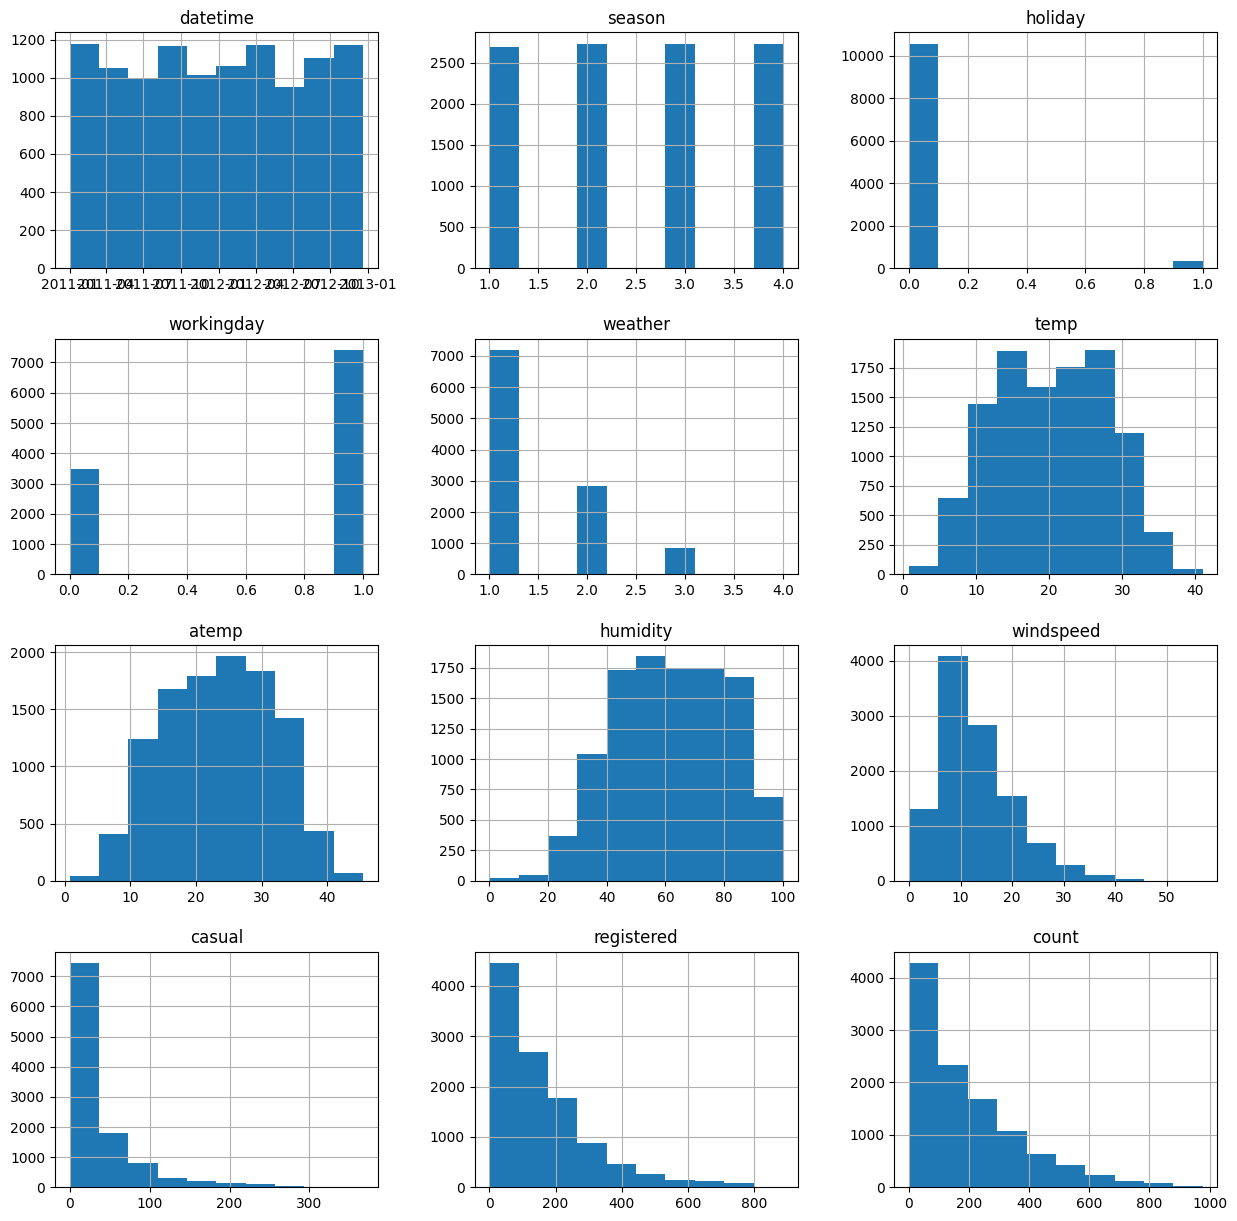

In [27]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize=(15,15))

## Examining day time statistics

In [28]:
# Examining years available
print("years in training data : ", train.datetime.dt.year.unique())
print("years in test data : ", test.datetime.dt.year.unique())
print("####")

# Examining months available
print("Months available in training data : ", train.datetime.dt.month.unique())
print("Months available in test data : ", test.datetime.dt.month.unique())
print("####")

# Examining days available
print("Days available in training data : ", train.datetime.dt.day.unique())
print("Days available in test data : ", test.datetime.dt.day.unique())
print("####")

# Examining hours available
print("Hours available in training data : ", train.datetime.dt.hour.unique())
print("Hours available in test data : ", test.datetime.dt.hour.unique())
print("####")


years in training data :  [2011 2012]
years in test data :  [2011 2012]
####
Months available in training data :  [ 1  2  3  4  5  6  7  8  9 10 11 12]
Months available in test data :  [ 1  2  3  4  5  6  7  8  9 10 11 12]
####
Days available in training data :  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Days available in test data :  [20 21 22 23 24 25 26 27 28 29 30 31]
####
Hours available in training data :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
Hours available in test data :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]
####


In [29]:
# create a new feature
train['hour'] = train.datetime.dt.hour
test['hour'] = test.datetime.dt.hour

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [30]:
train["season"] = train.season.astype('category')
train["weather"] = train.weather.astype('category')
test["season"] = test.season.astype('category')
test["weather"] = test.weather.astype('category')

In [31]:
# View are new feature
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


array([[<Axes: title={'center': 'datetime'}>,
        <Axes: title={'center': 'holiday'}>,
        <Axes: title={'center': 'workingday'}>],
       [<Axes: title={'center': 'temp'}>,
        <Axes: title={'center': 'atemp'}>,
        <Axes: title={'center': 'humidity'}>],
       [<Axes: title={'center': 'windspeed'}>,
        <Axes: title={'center': 'casual'}>,
        <Axes: title={'center': 'registered'}>],
       [<Axes: title={'center': 'count'}>,
        <Axes: title={'center': 'hour'}>, <Axes: >]], dtype=object)

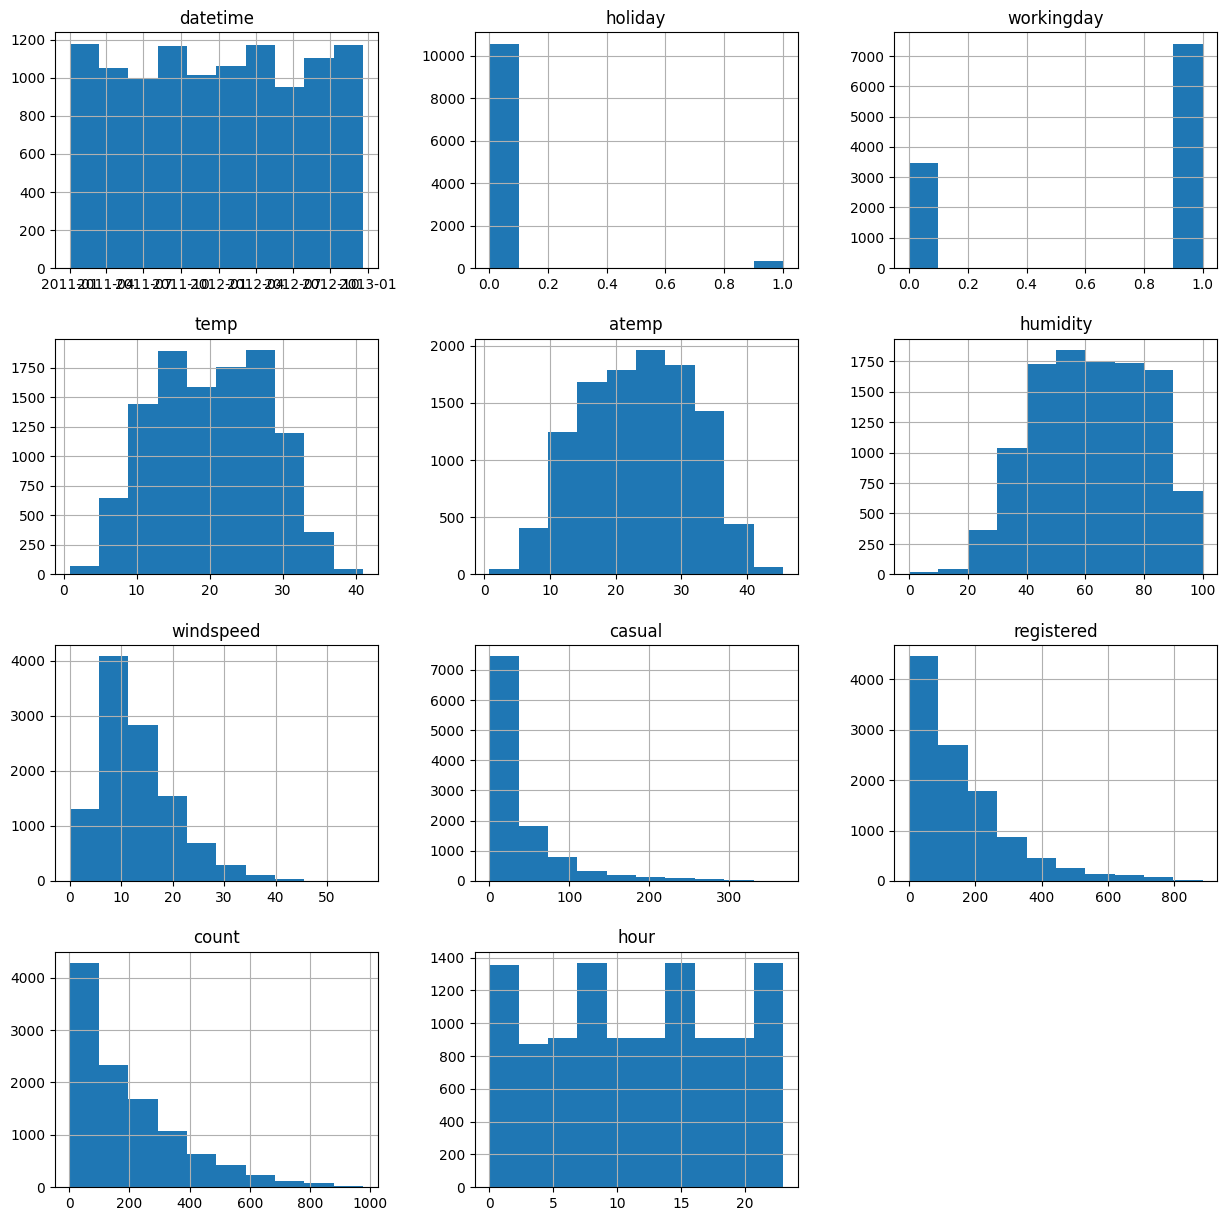

In [32]:
# View histogram of all features again now with the hour feature
train.hist(figsize=(15,15))

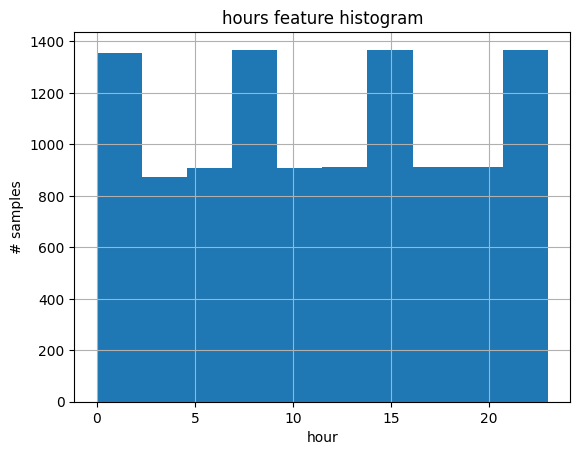

In [76]:
# hour feature histogram
ax = train['hour'].hist()
ax.set_xlabel('hour')
ax.set_ylabel('# samples')
ax.set_title('hours feature histogram')
fig = ax.get_figure()
fig.savefig('hour_feature_hist.png')

## Step 5: Rerun the model with the same settings as before, just with more features

In [37]:
# remove casual and registered columns since they are not recorded in the testset
df_train_new_features_cols = train.columns.to_list()
df_train_new_features_cols.remove('casual')
df_train_new_features_cols.remove('registered')

df_train_new_features = train[df_train_new_features_cols]
df_train_new_features.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,16,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,40,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,32,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,13,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,1,4


In [38]:
predictor_new_features = TabularPredictor(
    label='count', 
    problem_type='regression', 
    eval_metric='root_mean_squared_error'
    ).fit(
    train_data=df_train_new_features, 
    time_limit=600, 
    presets='best_quality', 
    )

No path specified. Models will be saved in: "AutogluonModels/ag-20230522_155903/"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/ag-20230522_155903/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    10949.72 MB
	Train Data (Original)  Memory Usage: 0.72 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			No

In [39]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -30.349428      55.728584  517.842358                0.001722           0.535095            3       True         12
1          LightGBM_BAG_L2  -30.597970      51.159071  378.120597                0.623195          41.351601            2       True          9
2        LightGBMXT_BAG_L2  -31.111623      53.689969  392.433553                3.154093          55.664557            2       True          8
3          CatBoost_BAG_L2  -31.855185      50.853901  374.766423                0.318025          37.997427            2       True         11
4   RandomForestMSE_BAG_L2  -31.941208      51.631549  382.293678                1.095673          45.524682            2       True         10
5      WeightedEnsemble_L2  -32.347654      50.436282  337.412818         

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2': 'StackerEnsembleModel_CatBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -34.457273921492806,
  'LightGBM_BAG_L1': -33.919639163586254,
  'RandomForestMSE_BAG_L1': -38.4543378929385,
  'CatBoost_BAG_L1': -37.8919712004946,
  'WeightedEnsemble_L2': -32.34765396524193,
  'LightGBMXT_BAG_L2':

<Axes: xlabel='model'>

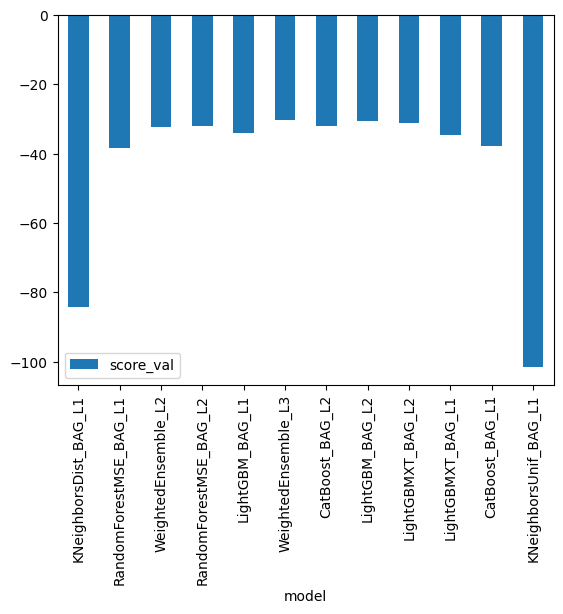

In [40]:
predictor_new_features.leaderboard(df_train_new_features, silent=True).plot(kind='bar', x='model', y='score_val')

In [41]:
# Remember to set all negative values to zero
predictions_new_features = predictor_new_features.predict(test, as_pandas=True)

In [42]:
(predictions_new_features < 0).sum()

0

In [43]:
predictions_new_features[predictions_new_features < 0] = 0

In [44]:
# Same submitting predictions
submission_new_features = pd.read_csv('submission.csv')
submission_new_features["count"] = predictions_new_features
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [45]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100% 188k/188k [00:01<00:00, 156kB/s]
Successfully submitted to Bike Sharing Demand

In [46]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2023-05-22 16:15:44  new features          complete  0.64160      0.64160       
submission.csv               2023-05-22 15:56:20  first raw submission  complete  1.80405      1.80405       


#### New Score of 0.64160

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [47]:
import autogluon.core as ag
# hyperparameter settings
gbm_options = {
    'num_boost_round' : ag.space.Int(lower=100, upper=500, default=100),
    'num_leaves' : ag.space.Int(lower=6, upper=10),
    'learning_rate' : ag.space.Real(lower=0.01, upper=0.3, log=True)
}


cat_options = {
    'iterations' : 100,
    'learning_rate' : ag.space.Real(lower=0.01, upper=0.3, log=True),
    'depth' : ag.space.Int(lower=6, upper=10)
}
xgb_options = {
    'n_estimators' : ag.space.Int(lower=100, upper=500, default=100),
    'max_depth' : ag.space.Int(lower=6, upper=10, default=6),
    'eta' : ag.space.Real(lower=0.01, upper=0.3, log=True)
}


In [48]:
# Choosing specific hyperparameter options
# Models : GBM, CAT, XGB, RF, XT, KNN, LR, NN_MXNET, NN_TORCH
hyperparameters = {
    'XGB' : xgb_options,
    'GBM' : gbm_options,
    'CAT' : cat_options
}

num_trials = 5
search_strategy = 'random'

hyperparameter_tune_kwargs = {
    'num_trials' : num_trials,
    'scheduler' : 'local',
    'searcher' : search_strategy
}

In [62]:
predictor_new_hpo = TabularPredictor(
    label='count', 
    problem_type='regression', 
    eval_metric='root_mean_squared_error',
    path='AutogluonModels/xgb_gbm_cat_tuning_v1'
    ).fit(
    train_data=df_train_new_features, 
    time_limit=600, 
    presets='best_quality',
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,
    )

Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=20
Beginning AutoGluon training ... Time limit = 600s
AutoGluon will save models to "AutogluonModels/xgb_gbm_cat_tuning_v1/"
AutoGluon Version:  0.7.0
Python Version:     3.10.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP Sat Apr 29 09:15:28 UTC 2023
Train Data Rows:    10886
Train Data Columns: 10
Label Column: count
Preprocessing data ...
Using Feature Generators to preprocess the data ...
Fitting AutoMLPipelineFeatureGenerator...
	Available Memory:                    11215.6 MB
	Train Data (Original)  Memory Usage: 0.72 MB (0.0% of available memory)
	Inferring data type of each feature based on column values. Set feature_metadata_in to manually specify special dtypes of the features.
	Stage 1 Generators:
		Fitting AsTypeFeatureGenerator...
			Note: Converting 2 features to boolean dtype as they only contain 2 unique values.

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L1/T1 ...
	-123.3311	 = Validation score   (-root_mean_squared_error)
	39.61s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L1/T2 ...
	-39.1758	 = Validation score   (-root_mean_squared_error)
	45.06s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L1 ... Tuning model for up to 119.93s of the 514.97s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L1/T1 ...
	-112.9033	 = Validation score   (-root_mean_squared_error)
	36.75s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost_BAG_L1/T2 ...
	-36.0601	 = Validation score   (-root_mean_squared_error)
	46.39s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L1 ... Tuning model for up to 119.93s of the 431.69s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L1/T1 ...
	-38.0755	 = Validation score   (-root_mean_squared_error)
	30.18s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T2 ...
	-35.8635	 = Validation score   (-root_mean_squared_error)
	49.41s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L1/T3 ...
	-35.0334	 = Validation score   (-root_mean_squared_error)
	49.02s	 = Training   runtime
	0.0s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.0s of the 302.88s of remaining time.
	-33.7945	 = Validation score   (-root_mean_squared_error)
	0.69s	 = Training   runtime
	0.0s	 = 

  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: LightGBM_BAG_L2/T1 ...
	-76.712	 = Validation score   (-root_mean_squared_error)
	40.38s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: LightGBM_BAG_L2/T2 ...
	-34.0126	 = Validation score   (-root_mean_squared_error)
	41.66s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: CatBoost_BAG_L2 ... Tuning model for up to 90.65s of the 219.92s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: CatBoost_BAG_L2/T1 ...
	-77.9626	 = Validation score   (-root_mean_squared_error)
	38.87s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: CatBoost_BAG_L2/T2 ...
	-34.6952	 = Validation score   (-root_mean_squared_error)
	68.35s	 = Training   runtime
	0.0s	 = Validation runtime
Hyperparameter tuning model: XGBoost_BAG_L2 ... Tuning model for up to 90.65s of the 112.49s of remaining time.


  0%|          | 0/5 [00:00<?, ?it/s]

	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Fitting 8 child models (S1F1 - S1F8) | Fitting with ParallelLocalFoldFittingStrategy
	Stopping HPO to satisfy time limit...
Fitted model: XGBoost_BAG_L2/T1 ...
	-34.6899	 = Validation score   (-root_mean_squared_error)
	37.98s	 = Training   runtime
	0.0s	 = Validation runtime
Fitted model: XGBoost_BAG_L2/T2 ...
	-34.9682	 = Validation score   (-root_mean_squared_error)
	58.71s	 = Training   runtime
	0.0s	 = Validation runtime
Completed 1/20 k-fold bagging repeats ...
Fitting model: WeightedEnsemble_L3 ... Training model for up to 360.0s of the 15.63s of remaining time.
	-33.8273	 = Validation score   (-root_mean_squared_error)
	0.53s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training complete, total runtime = 584.94s ... Best model: "WeightedEnsemble_L2"
TabularPredictor saved. To load, use: predictor = TabularPredictor.load("AutogluonModels/xgb_gbm_cat_tuning_v1/")


In [63]:
predictor_new_hpo.fit_summary(verbosity=3)

*** Summary of fit() ***
Estimated performance of each model:
                  model   score_val  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L2  -33.794456       0.001861  145.507394                0.001371           0.686822            2       True          8
1   WeightedEnsemble_L3  -33.827269       0.004970  503.657226                0.001535           0.528773            3       True         15
2    LightGBM_BAG_L2/T2  -34.012635       0.001388  338.086319                0.000177          41.660851            2       True         10
3     XGBoost_BAG_L2/T1  -34.689921       0.001384  334.409030                0.000173          37.983562            2       True         13
4    CatBoost_BAG_L2/T2  -34.695225       0.001374  364.773736                0.000164          68.348268            2       True         12
5     XGBoost_BAG_L2/T2  -34.968216       0.002921  355.135773                0.001710      

/usr/local/lib/python3.10/dist-packages/autogluon/core/utils/plots.py:138: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L1/T2': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L1/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T2': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L1/T3': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'CatBoost_BAG_L2/T2': 'StackerEnsembleModel_CatBoost',
  'XGBoost_BAG_L2/T1': 'StackerEnsembleModel_XGBoost',
  'XGBoost_BAG_L2/T2': 'StackerEnsembleModel_XGBoost',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -123.33106763728148,
  'LightGBM_BAG_L1/T2': -39.17581752664111,
  'CatBoost_BAG_L1/T1': -112.90326523305363,
  'CatBoost_BAG_L1

<Axes: xlabel='model'>

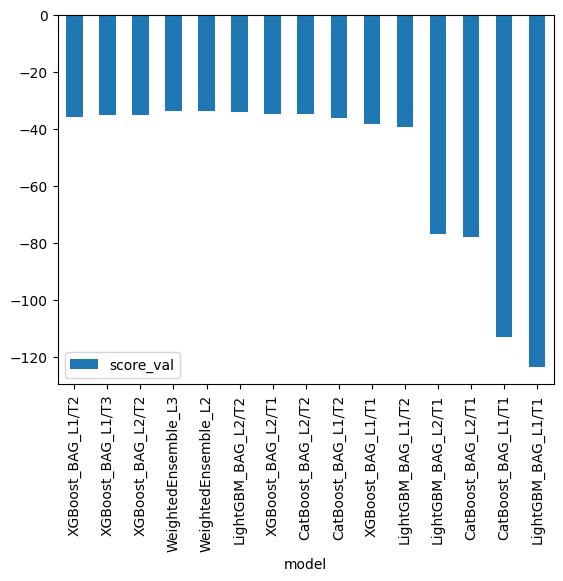

In [64]:
predictor_new_hpo.leaderboard(df_train_new_features, silent=True).plot(kind='bar', x='model', y='score_val')

In [65]:
# Remember to set all negative values to zero
predictions_new_hpo = predictor_new_hpo.predict(test, as_pandas=True)

In [66]:
(predictions_new_hpo < 0).sum()

71

In [67]:
predictions_new_hpo[predictions_new_hpo < 0] = 0

In [68]:
# Same submitting predictions
submission_new_hpo = submission
submission_new_hpo["count"] = predictions_new_hpo
# # testing rounding predictions
# submission_new_hpo['count'] = submission_new_hpo["count"].astype('int64')
submission_new_hpo.to_csv("submission_new_hpo_cat_gbm_xgb_2.csv", index=False)

In [56]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo_cat_gbm_xgb_2.csv -m "new features with hyperparameters cat xgb gbm 2 rounded"

100% 188k/188k [00:00<00:00, 255kB/s]
Successfully submitted to Bike Sharing Demand

In [57]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                              date                 description                                              status    publicScore  privateScore  
------------------------------------  -------------------  -------------------------------------------------------  --------  -----------  ------------  
submission_new_hpo_cat_gbm_xgb_2.csv  2023-05-22 16:24:11  new features with hyperparameters cat xgb gbm 2 rounded  complete  0.54003      0.54003       
submission_new_features.csv           2023-05-22 16:15:44  new features                                             complete  0.64160      0.64160       
submission.csv                        2023-05-22 15:56:20  first raw submission                                     complete  1.80405      1.80405       


#### New Score of 0.54003

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

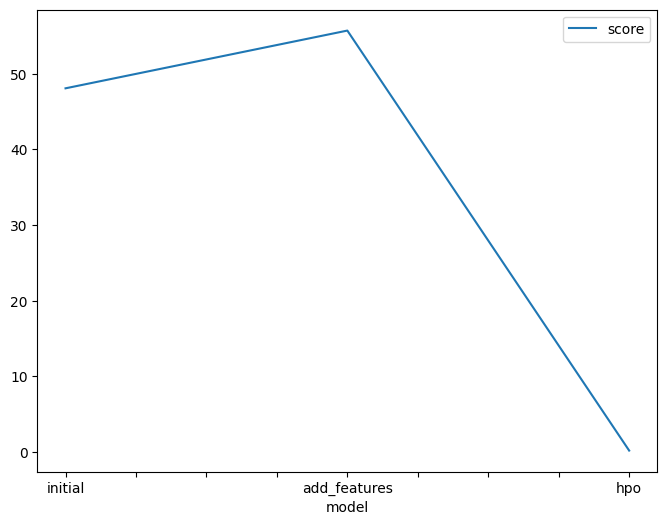

In [71]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [48.086 , 55.72 , 0.1861]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

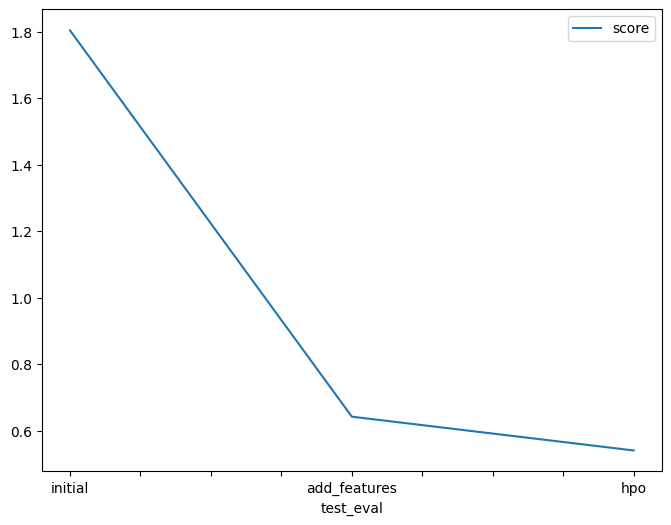

In [72]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80405, 0.6416, 0.54003]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_test_score.png')

### Hyperparameter table

In [84]:
# The 3 hyperparameters we tuned with the kaggle score as the result
table_df = pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": [
        'default_vals', 
        'default_vals', 
        'GBM (Light gradient boosting) : num_boost_round: [lower=100, upper=500], num_leaves:[lower=6, upper=10], learning_rate:[lower=0.01, upper=0.3, log scale], applying random search with 5 trials'
        ],
    "hpo2": [
        'default_vals', 
        'default_vals', 
        'XGB (XGBoost): n_estimators : [lower=100, upper=500], max_depth : [lower=6, upper=10], eta (learning_rate) : [lower=0.01, upper=0.3, log scale] applying random search with 5 trials'
        ],
    "hpo3": [
        'default_vals', 
        'default_vals', 
        'CAT (CATBoost) : iterations : 100, depth : [lower=6, upper=10], learning_rate  : [lower=0.01, upper=0.3, log scale] applying random search with 5 trials'
    ],
    "score": [1.80405, 0.6416, 0.54003]
})

table_df

,model,hpo1,hpo2,hpo3,score
0,initial,default_vals,default_vals,default_vals,1.80405
1,add_features,default_vals,default_vals,default_vals,0.64160
2,hpo,GBM (Light gradient boosting) : num_boost_roun...,"XGB (XGBoost): n_estimators : [lower=100, uppe...","CAT (CATBoost) : iterations : 100, depth : [lo...",0.54003


In [85]:
print(table_df.to_markdown())

|    | model        | hpo1                                                                                                                                                                                            | hpo2                                                                                                                                                                                 | hpo3                                                                                                                                                     |   score |
|---:|:-------------|:------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:-------------------------------------